# Python Numpy package 
- How to create an array 
- How to access an array
- How to compute arrays

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Create Arrays

In [21]:
myList1 = [1,2,3]  # a 1-dimensional array / list
A1 = np.array(myList1)  # convert from a list to a 1-dimensional array
print(A1)
myList2 = [[1,2,3],[4,5,6]]  # a list of lists
A2 = np.array(myList2) # convert from a list of lists to a 2-dimensional numpy array
print(A2)

[1 2 3]
[[1 2 3]
 [4 5 6]]


In [29]:
B = np.zeros([2,3])  # create a two-dimensional array (2x3) with initial values of 0
C = np.ones(10, dtype=float)  # create a one-dimensional array with 1.0s. It is the float type by default.

In [84]:
C = np.array(range(10))

In [95]:
D = np.random.randint(0, 10, (3,3))

In [96]:
D

array([[9, 2, 9],
       [7, 0, 8],
       [7, 5, 8]])

## Array Attributes

In [39]:
B.shape  # the shape of array

(2, 3)

In [42]:
C.ndim  # the number of dimensions

1

In [44]:
D.size  # the size of array rwo*column

9

In [47]:
C.dtype  # the type of array

dtype('float64')

## Array Indexing

In [50]:
D

array([[2, 5, 3],
       [1, 0, 7],
       [6, 7, 4]])

- Multidimensional array index: [i][j] == [i,j]
- For example, D[0][0] is the same as D[0,0]

In [75]:
D[2,2] 
D[2][2] # D[i][j] == D[i,j]

4

In [85]:
C

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- Index can be a negative number in Python

In [76]:
C[-1]

9

## Array Slicing

- Colon (:) is a magic symbol in Python array index
- Use : to get a range of data in an array
- Syntax: [start:end:step]. The step is optional, which is 1 by default.
- For example: A[1:5] means to access array A from index 1 to 5 (less than 5) 

In [164]:
C[1:10:2]  # from 1 to 10 with step of 2.  C++: for(int i=1; i<5; i++) C[i]

array([1, 3, 5, 7, 9])

In [91]:
C[1:] # from 1 to the end

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [90]:
C[:] # everything

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [92]:
C[:5] # from 0 to 5

array([0, 1, 2, 3, 4])

In [169]:
C[4:8] = 1    # equal to C++: for(int i=4; i<8; i++) C[i]=1;

In [170]:
C

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0])

In [171]:
D[1:3,:] = 0

In [172]:
D

array([[0, 2, 9],
       [0, 0, 0],
       [0, 0, 0]])

- use "view" to access a portion of array

In [173]:
D1 = D[:2,:2]

In [174]:
D1

array([[0, 2],
       [0, 0]])

In [175]:
D1[0,0]=1

In [176]:
D1

array([[1, 2],
       [0, 0]])

In [177]:
D

array([[1, 2, 9],
       [0, 0, 0],
       [0, 0, 0]])

- use copy() to copy to a new array

In [104]:
D2 = D1.copy()

In [106]:
D2[0,0] = 1

In [109]:
D2

array([[1, 2],
       [7, 0]])

## Array Reshaping 

In [110]:
C.shape

(10,)

- reshape from 1 dimension to 2 dimensions

In [115]:
C1 = C.reshape((2,5))

In [113]:
C1.shape

(2, 5)

In [178]:
C1

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

- reshape from 2 dimensions to 1 dimension
- Make sure the size keeps same

In [117]:
D3 = D.reshape(9)

In [118]:
D3

array([0, 2, 9, 7, 0, 8, 7, 5, 8])

- Concatenate two arrays

In [120]:
E = np.concatenate([C, D3])

In [121]:
E

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 2, 9, 7, 0, 8, 7, 5, 8])

## Array Computation

- Python Numpy style: to compute all of these elements at the same time in parallel

In [133]:
C = np.array(range(10))
C2 = 1.0/(C+1)  # Array computation in parallel
C2

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
       0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ])

- OLD C/C++ style: sequential execution to assign C[] one by one

In [129]:
#omp parallel for
for i in range(10):
    C[i] = 1.0/(C[i]+1)

In [179]:
def recipocals(values):
    output = np.zeros(len(values))
    for i in range(len(values)):
        output[i] = 1.0/values[i]
    return output

In [183]:
A = np.random.randint(1,10,size=2000000)

In [184]:
A

array([1, 4, 5, ..., 3, 9, 6])

In [187]:
%time reciprocals(A)

CPU times: user 4.05 s, sys: 72.7 ms, total: 4.12 s
Wall time: 4.44 s


array([1.        , 0.25      , 0.2       , ..., 0.33333333, 0.11111111,
       0.16666667])

In [188]:
%time 1.0/A

CPU times: user 8.75 ms, sys: 6.43 ms, total: 15.2 ms
Wall time: 14.1 ms


array([1.        , 0.25      , 0.2       , ..., 0.33333333, 0.11111111,
       0.16666667])

In [191]:
speedup = 4.44*1000/14.1
speedup

314.8936170212766

## Python UFuncs
- Unary UFuncs: computing only one numpy array
  - addtion: np.add, +
  - substraction: np.substract, -
  - negative: np.negative, -
  - multiplication: np.multiply, *
  - divide: np.divide, /
  - floor divide: np.floor_divide, // e.g. 3//2=1 
  - power: np.power, **
  - modulus: np.mod, %
  - sum
  
- Binary UFuncs: computing two numpy arrays

In [195]:
B = np.ones(10)
B

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [198]:
-B

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [205]:
#sum vs. np.sum(B)
%time sum(A)

CPU times: user 287 ms, sys: 4.4 ms, total: 292 ms
Wall time: 315 ms


10005593

In [206]:
%time np.sum(A)

CPU times: user 2.18 ms, sys: 769 µs, total: 2.95 ms
Wall time: 1.74 ms


10005593

In [209]:
%time
np.min(A)
np.max(A)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


9

In [212]:
%time
min(A)
max(A)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


9

In [218]:
B.shape
B

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [219]:
C.shape
C

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0])

In [217]:
B+C

array([1., 1., 1., 1., 2., 2., 2., 2., 1., 1.])

In [222]:
C/B

array([0., 0., 0., 0., 1., 1., 1., 1., 0., 0.])

In [17]:
C = np.array([ [i*j for i in range(1,3)] for j in range(1,4)])

In [224]:
D = np.ones([2,3])
E = np.ones([3,2])

In [225]:
np.matmul(D,E)

array([[3., 3.],
       [3., 3.]])

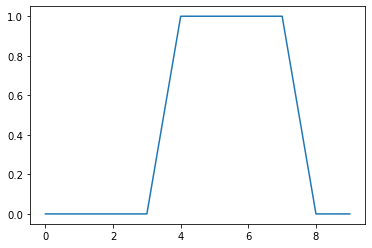

In [228]:
plt.plot(C)

Text(0.5, 0, 'x')

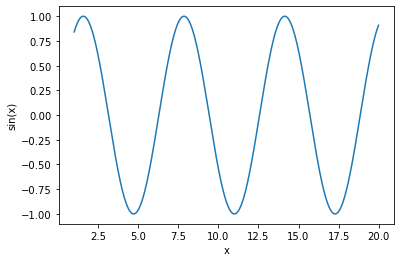

In [229]:
plt.plot(np.arange(1,20,0.01), [math.sin(i) for i in np.arange(1,20,0.01)])
plt.ylabel("sin(x)")
plt.xlabel("x")